<a href="https://colab.research.google.com/github/jabanitaha/data-mining-2-/blob/main/water_supply%20dbscan%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats



In [12]:
water_supply = pd.read_excel('/content/final Jordan Water Supply 1997 - 2023.xlsx')
# pd.read_excel is used to read excel files directly, removing encoding issues associated with pd.read_csv.
# Make sure the path and filename are correct and the file exists

print('There are {} rows and {} columns in our dataset.'.format(water_supply.shape[0], water_supply.shape[1]))

There are 326 rows and 3 columns in our dataset.


In [13]:
from sklearn.cluster import DBSCAN

In [14]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [19]:
# Check the actual column names in your DataFrame
print(water_supply.columns)

# Replace 'ActualColumnName1', 'ActualColumnName2', 'ActualColumnName3'
# with the correct names based on the output of the print statement above
X_numerics = water_supply[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2']].copy()
# For example, if the columns are 'Governorate', 'Year', 'Water supply liter /day ', use:
# X_numerics = water_supply[['Governorate', 'Year', 'Water supply liter /day ']].copy()

# Print updated columns for visual inspection
print(X_numerics.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')
Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')


In [22]:
# Check the actual column names in your DataFrame
print(water_supply.columns)

# Now, replace 'Year' and 'Water supply liter /day '
# with the actual column names from the printed output
X_numerics = water_supply[['Unnamed: 1', 'Unnamed: 2']].copy()
# For example, if the actual column names are 'Year_Column', 'Water_Supply_Column'
# X_numerics = water_supply[['Year_Column', 'Water_Supply_Column']].copy()

# Print updated columns for visual inspection
print(X_numerics.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')
Index(['Unnamed: 1', 'Unnamed: 2'], dtype='object')


Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')
Index(['Unnamed: 1', 'Unnamed: 2'], dtype='object')
Unnamed: 1    float64
Unnamed: 2    float64
dtype: object


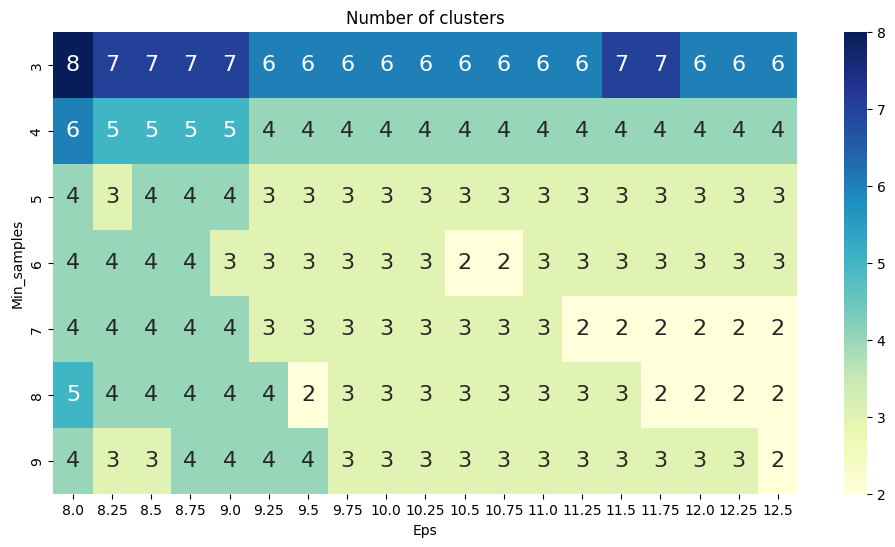

In [28]:
# Check the actual column names in your DataFrame
print(water_supply.columns)

# Now, replace 'Unnamed: 1', 'Unnamed: 2' with the actual column names from the printed output
# Assuming 'Unnamed: 1' corresponds to 'Year' and 'Unnamed: 2' to 'Water supply liter /day '
# If the column names are different, adjust accordingly
# Ensure the column containing years is converted to numeric type
X_numerics = water_supply[['Unnamed: 1', 'Unnamed: 2']].copy()  # Selecting columns by their actual names
X_numerics['Unnamed: 1'] = pd.to_numeric(X_numerics['Unnamed: 1'], errors='coerce')  # Convert 'Year' column to numeric
X_numerics['Unnamed: 2'] = pd.to_numeric(X_numerics['Unnamed: 2'], errors='coerce')  # Convert 'Water supply liter /day ' column to numeric

# Drop rows with NaN values
X_numerics.dropna(inplace=True) #This line added to handle NaN

# Print updated columns for visual inspection
print(X_numerics.columns)
print(X_numerics.dtypes)  # Check data types of columns

from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

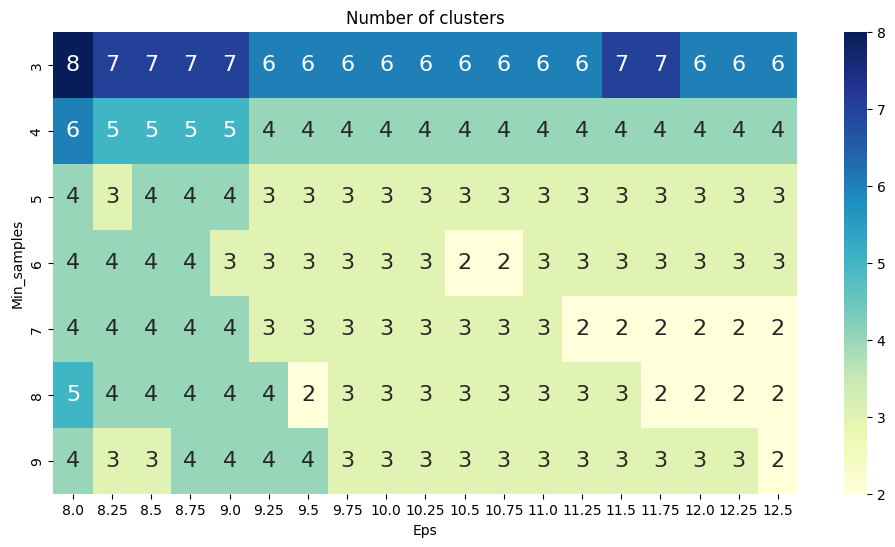

In [29]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

The heatplot above shows, t**he number of clusters vary from 17 to 4.** However, most of the combinations gives 4-7 clusters. To decide which combination to choose I will use a metric - a silhuette score and I will plot it as a heatmap again

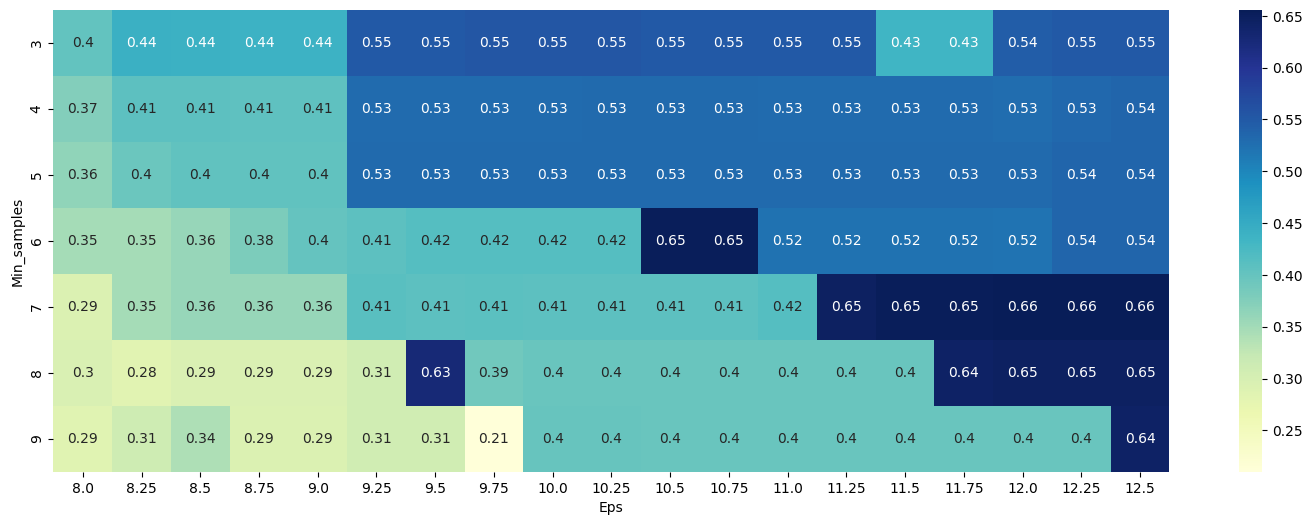

In [30]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

**Global maximum is 0.26 for eps=12.5 and min_samples=4.**

In [32]:
#Check your column names, 'Unnamed: 1', and 'Unnamed: 2' might need replacement
X_numerics = water_supply[['Unnamed: 1', 'Unnamed: 2']].copy()
X_numerics['Unnamed: 1'] = pd.to_numeric(X_numerics['Unnamed: 1'], errors='coerce')
X_numerics['Unnamed: 2'] = pd.to_numeric(X_numerics['Unnamed: 2'], errors='coerce')
X_numerics.dropna(inplace=True)

from sklearn.cluster import DBSCAN
# Based on the silhuette score heatmap, you chose eps=12.5 and min_samples=4.
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

# Create the DBSCAN_clustered DataFrame here to define it
DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:, 'Cluster'] = DBS_clustering.labels_

# Now you can proceed with your code
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,9
0,303
1,4
2,8


DBSCAN created 5 clusters plus outliers cluster (-1). **Sizes of clusters 0-4 **vary significantly - some have only 4 or 8 observations. T**here are 18 outliers.**

In [33]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

ValueError: Could not interpret value `Governorate` for `x`. An entry with this name does not appear in `data`.

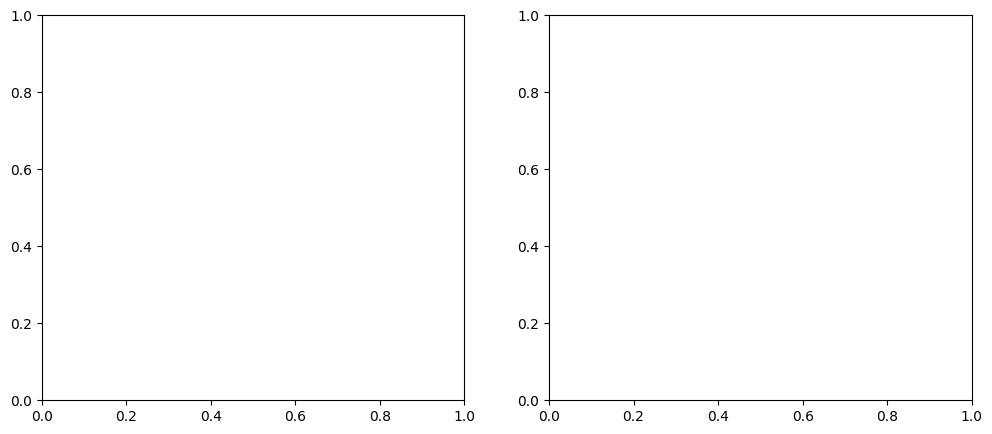

In [35]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Governorate', y='Water supply liter /day',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='Year', y='Water supply liter /day',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Governorate'], outliers['Water supply liter /day'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Year'], outliers['Water supply liter /day)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

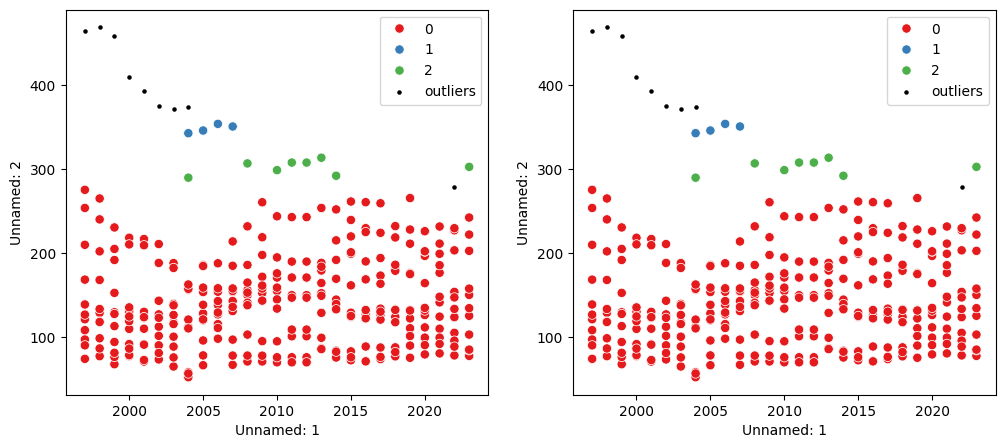

In [36]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

# Replace 'Governorate' with 'Unnamed: 1' and 'Water supply liter /day' with 'Unnamed: 2'
sns.scatterplot(x='Unnamed: 1', y='Unnamed: 2',  # Corrected column names
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='Unnamed: 1', y='Unnamed: 2',  # Corrected column names
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Unnamed: 1'], outliers['Unnamed: 2'], s=5, label='outliers', c="k")  # Corrected column names
axes[1].scatter(outliers['Unnamed: 1'], outliers['Unnamed: 2'], s=5, label='outliers', c="k")  # Corrected column names
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()